<a href="https://colab.research.google.com/github/kartikgill/The-GAN-Book/blob/main/Skill-05/Latent-Space-Exploration/Anime-latent-code-experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [ ]:
import tensorflow
print (tensorflow.__version__)

2.3.0


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
generator_network = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/GAN_datasets/anime_saved_model')

In [ ]:
def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

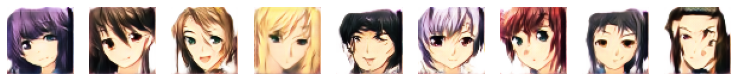

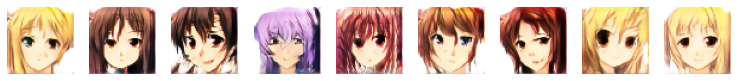

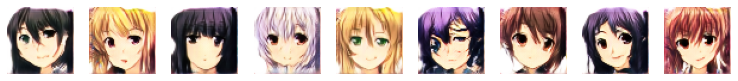

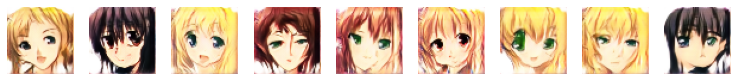

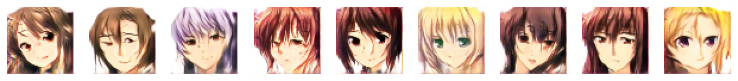

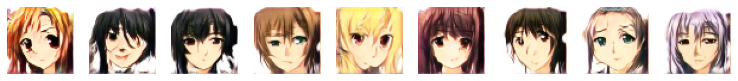

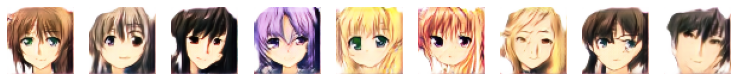

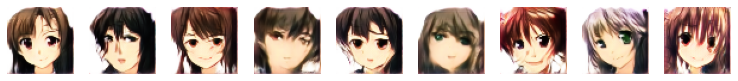

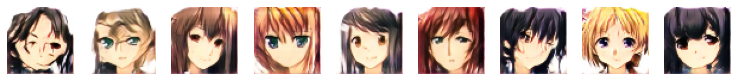

In [ ]:
noise_size = 100
random_noise_batches = get_random_noise(100, noise_size)
fake_samples = generator_network.predict_on_batch(random_noise_batches)

fake_samples = (fake_samples+1.0)/2.0
counter = 0
for k in range(9):
    plt.figure(figsize=(13, 13))
    for j in range(9):
        plt.subplot(990 + 1 + j)
        plt.imshow(fake_samples[counter])
        counter += 1
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

In [ ]:
yellow_hairs = [3, 9, 16, 17, 19, 22, 29, 33, 34]
black_hairs = [1, 4, 7, 8, 11, 18, 20, 28, 35]
blue_hairs = [0, 12, 23, 25, 38, 57]
red_hairs = [6, 13, 15, 30, 39, 40, 42, 43]

In [ ]:
yellow_avg_latent_code = np.mean(random_noise_batches[np.array(yellow_hairs),:], axis=0)
black_avg_latent_code = np.mean(random_noise_batches[np.array(black_hairs),:], axis=0)
blue_avg_latent_code = np.mean(random_noise_batches[np.array(blue_hairs),:], axis=0)
red_avg_latent_code = np.mean(random_noise_batches[np.array(red_hairs),:], axis=0)

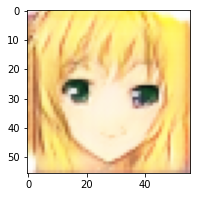

In [ ]:
fake_sample = generator_network.predict(np.array([yellow_avg_latent_code]))
fake_sample = (fake_sample[0]+1.0)/2.0
plt.figure(figsize=(3,3))
plt.imshow(fake_sample)
plt.show()

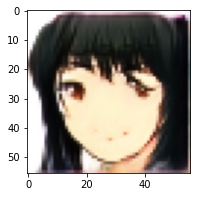

In [ ]:
fake_sample = generator_network.predict(np.array([black_avg_latent_code]))
fake_sample = (fake_sample[0]+1.0)/2.0
plt.figure(figsize=(3,3))
plt.imshow(fake_sample)
plt.show()

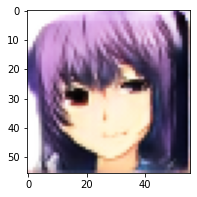

In [ ]:
fake_sample = generator_network.predict(np.array([blue_avg_latent_code]))
fake_sample = (fake_sample[0]+1.0)/2.0
plt.figure(figsize=(3,3))
plt.imshow(fake_sample)
plt.show()

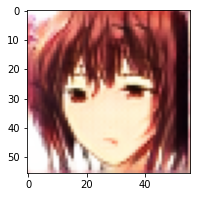

In [ ]:
fake_sample = generator_network.predict(np.array([red_avg_latent_code]))
fake_sample = (fake_sample[0]+1.0)/2.0
plt.figure(figsize=(3,3))
plt.imshow(fake_sample)
plt.show()

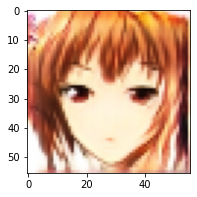

In [ ]:
# RED plus YELLOW
red_yellow_avg = (red_avg_latent_code + yellow_avg_latent_code)/2.0

fake_sample = generator_network.predict(np.array([red_yellow_avg]))
fake_sample = (fake_sample[0]+1.0)/2.0
plt.figure(figsize=(3,3))
plt.imshow(fake_sample)
plt.show()

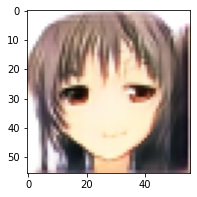

In [ ]:
# BLUE plus YELLOW
blue_yellow_avg = (blue_avg_latent_code + yellow_avg_latent_code)/2.0

fake_sample = generator_network.predict(np.array([blue_yellow_avg]))
fake_sample = (fake_sample[0]+1.0)/2.0
plt.figure(figsize=(3,3))
plt.imshow(fake_sample)
plt.show()

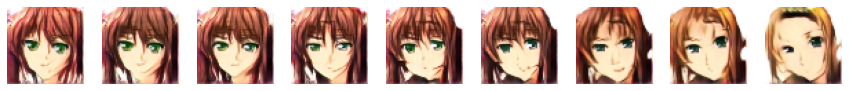

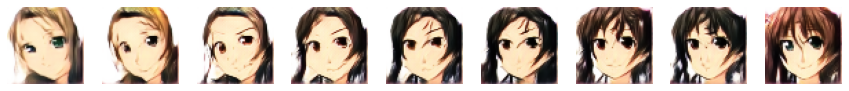

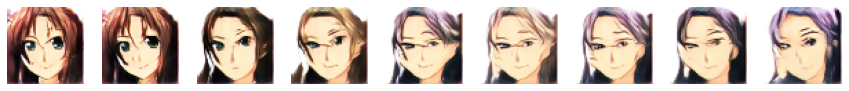

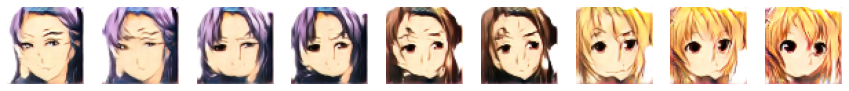

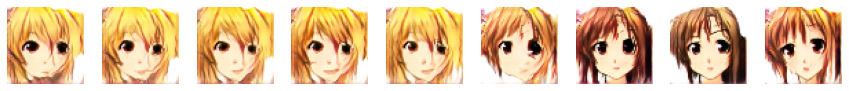

In [ ]:
# Lets play with Yellow
for iter in range(5):
    plt.figure(figsize=(15,15))
    for i in range(9):  
        code = yellow_avg_latent_code
        mask = np.random.randn(10)
        code[i*10: i*10 + 10] = mask
        fake_sample = generator_network.predict(np.array([code]))
        fake_sample = (fake_sample[0]+1.0)/2.0
        plt.subplot(990 + 1 + i)
        plt.axis('off')
        plt.imshow(fake_sample)
    plt.show()